#Energy Consumption EDA and Prediction

**Description:**

This dataset is designed for predicting energy consumption based on various building features and environmental factors. It contains data for multiple building types, square footage, the number of occupants, appliances used, average temperature, and the day of the week. The goal is to build a predictive model to estimate energy consumption using these attributes.

The dataset can be used for training machine learning models such as linear regression to forecast energy needs based on the building's characteristics. This is useful for understanding energy demand patterns and optimizing energy consumption in different building types and environmental conditions.

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### Reading the data

In [3]:
df_train=pd.read_csv('/content/train_energy_data.csv')
df_train

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17
...,...,...,...,...,...,...,...
995,Residential,14419,68,44,23.95,Weekend,3661.21
996,Industrial,12194,7,22,14.67,Weekend,3546.34
997,Commercial,39562,88,20,32.18,Weekday,5147.21
998,Residential,8348,67,37,16.48,Weekend,3244.98


**The Dataset**

The dataset contains information about buildings and their energy consumption. Each row represents a building, and the columns give details like:

Building Type: Whether the building is residential, commercial, or industrial.

Square Footage: The size of the building.

Number of Occupants: How many people are in the building.

Appliances Used: The number of appliances.

Average Temperature: The temperature in the building.

Day of Week: Whether it's a weekday or weekend.

Energy Consumption: The energy used by the building (this is what we want to predict).

####Info of the data

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


#### Checking null values

In [ ]:
df_train.isnull().sum()

,0
Building Type,0
Square Footage,0
Number of Occupants,0
Appliances Used,0
Average Temperature,0
Day of Week,0
Energy Consumption,0


#### Columns

In [ ]:
df_train.columns

Index(['Building Type', 'Square Footage', 'Number of Occupants',
       'Appliances Used', 'Average Temperature', 'Day of Week',
       'Energy Consumption'],
      dtype='object')

#### Statistical Description of the data

In [ ]:
df_train.describe()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
count,1000.000,1000.000000,1000.000000,1000.000000,1000.000000
mean,25462.388,48.372000,25.606000,22.611390,4166.252570
std,14294.554,29.061972,14.105166,7.139943,933.313064
min,560.000,1.000000,1.000000,10.050000,1683.950000
25%,13169.750,22.000000,13.000000,16.475000,3509.482500
50%,25477.000,47.000000,26.000000,22.815000,4175.730000
75%,37446.250,73.250000,38.000000,28.850000,4863.850000
max,49997.000,99.000000,49.000000,34.990000,6530.600000


#**EDA**

#### Histogram for Energy Consumption

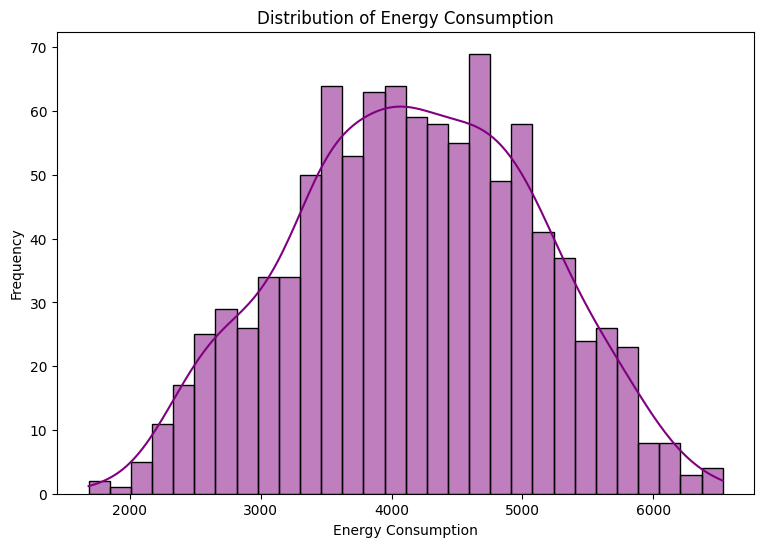

In [ ]:
plt.figure(figsize=(9,6))
sns.histplot(data=df_train,x='Energy Consumption',color='purple',bins=30,kde=True)
plt.xlabel('Energy Consumption')
plt.ylabel('Frequency')
plt.title('Distribution of Energy Consumption')
plt.show()

##Average Energy consumption by Building Type

In [ ]:
avg_energy_consumption=df_train.groupby('Building Type')['Energy Consumption'].mean().sort_values(ascending=False)
avg_energy_consumption

,Energy Consumption
Building Type,
Industrial,4735.142618
Commercial,4130.023571
Residential,3681.626628


<ipython-input-30-acfa83b11776>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_train,x='Building Type',y='Energy Consumption',palette='viridis')


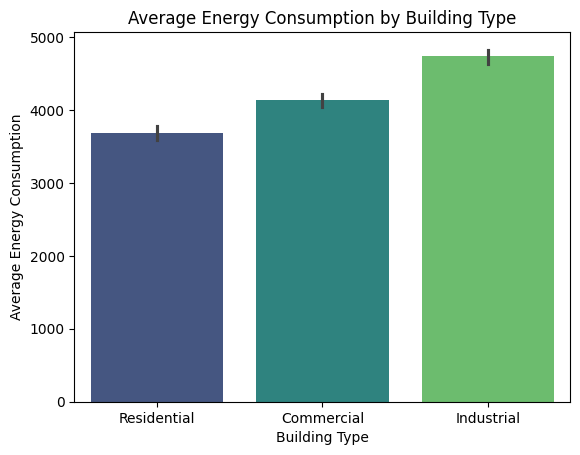

In [ ]:

sns.barplot(data=df_train,x='Building Type',y='Energy Consumption',palette='viridis')
plt.xlabel('Building Type')
plt.ylabel('Average Energy Consumption')
plt.title('Average Energy Consumption by Building Type')
plt.show()

##Square Footage vs Energy Consumption

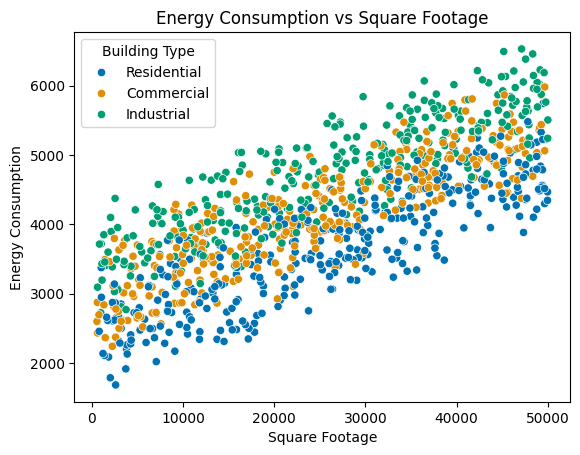

In [ ]:
sns.scatterplot(data=df_train, x='Square Footage',y='Energy Consumption',hue='Building Type',palette='colorblind')
plt.xlabel('Square Footage')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption vs Square Footage')
plt.show()

Residential energy use varies widely for a given size, influenced by factors like efficiency, appliances, and behavior.

Commercial buildings show a more linear relationship between size and energy use.

Industrial buildings have the highest energy use, driven by energy-intensive processes.

##Average Energy Consumption by Day of the Week

In [ ]:
avg_energy_consumption_day=df_train.groupby('Day of Week')['Energy Consumption'].mean().sort_values(ascending=False)
avg_energy_consumption_day

,Energy Consumption
Day of Week,
Weekday,4170.293491
Weekend,4162.096897


<ipython-input-41-d303d693b1d0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_train,x='Day of Week',y='Energy Consumption',palette='coolwarm')


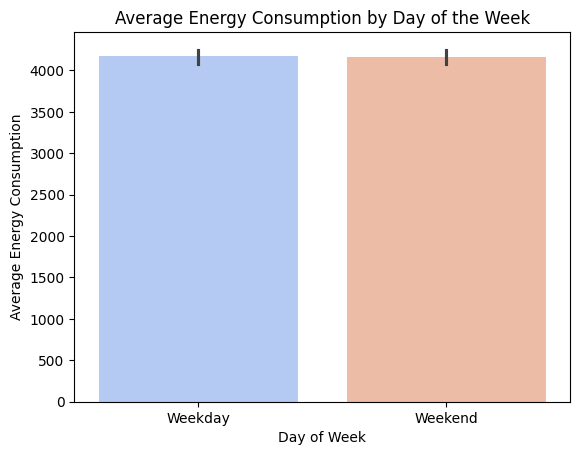

In [ ]:
sns.barplot(data=df_train,x='Day of Week',y='Energy Consumption',palette='coolwarm')
plt.xlabel('Day of Week')
plt.ylabel('Average Energy Consumption')
plt.title('Average Energy Consumption by Day of the Week')
plt.show()

##Regression plot for Average Temperature vs Energy Consumption

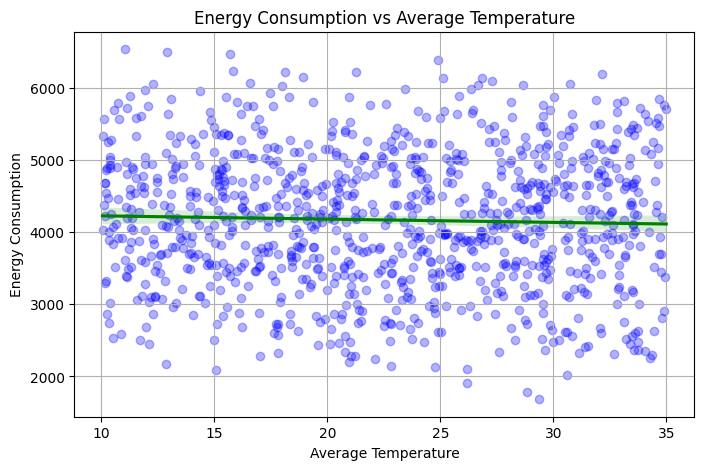

In [15]:
plt.figure(figsize=(8,5))
sns.regplot(data=df_train,x='Average Temperature',y='Energy Consumption',color='blue',scatter_kws={'alpha':0.3},line_kws={'color':'green'})
plt.xlabel('Average Temperature')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption vs Average Temperature')
plt.grid(True)
plt.show()

Energy consumption slightly increases at lower temperatures (below 15°C), likely due to heating needs. At higher temperatures (above 25°C), it slightly decreases, possibly due to cooling. However, energy use varies widely at all temperatures, meaning factors other than temperature also strongly influence energy consumption.

#MODEL BUILDING

In [16]:
df_train.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17


###One-Hot Encoding for Categorical features

The "Building Type" and "Day of Week" columns are categorical, meaning they have labels like "Residential" or "Weekend."

Computers work better with numbers, so these labels are converted into 0s and 1s using a method called "one-hot encoding."

For example, "Building Type_Residential" will be 1 if it's residential and 0 otherwise.

In [17]:
df_train_encoded = pd.get_dummies(df_train, columns=['Building Type', 'Day of Week'], drop_first=True)

df_train_encoded.head()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption,Building Type_Industrial,Building Type_Residential,Day of Week_Weekend
0,7063,76,10,29.84,2713.95,False,True,False
1,44372,66,45,16.72,5744.99,False,False,False
2,19255,37,17,14.30,4101.24,True,False,True
3,13265,14,41,32.82,3009.14,False,True,False
4,13375,26,18,11.92,3279.17,False,False,False


##Random Forest

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

The data is split into:

Training Data: 80% of the data used to train the model.

Test Data: 20% of the data to evaluate the model's accuracy on unseen examples.

In [19]:
X = df_train_encoded.drop(columns=['Energy Consumption'])
y = df_train_encoded['Energy Consumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# RMSE
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 124.80426199609629


A Random Forest model is built first. Think of it as a group of decision trees working together to make predictions.

Initial RMSE: The model gives a Root Mean Squared Error (RMSE) of 124.81.

RMSE is a measure of how far the predictions are from the actual values.

Lower RMSE = better model.

##Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [21]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"RMSE for Linear Regression: {rmse_lr}")

RMSE for Linear Regression: 0.013731382133186745


A Linear Regression model is also tested. This is the simplest model, where the algorithm tries to fit a straight line to the data.

Surprisingly, the Linear Regression model achieves an extremely low RMSE of 0.0137! This means its predictions are very close to the actual values.

###Comparing Actual Vs Predicted Value(Linear Regression)

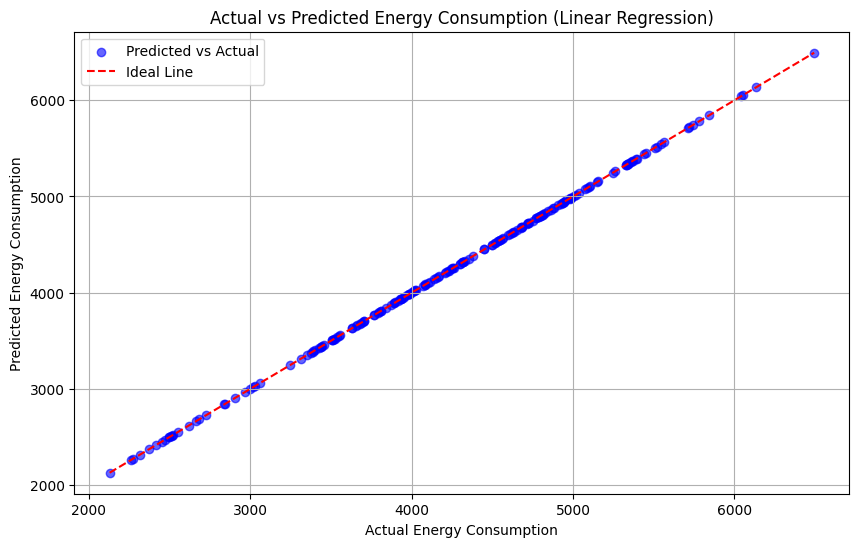

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Line')
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Actual vs Predicted Energy Consumption (Linear Regression)')
plt.legend()
plt.grid(True)
plt.show()

A scatter plot shows the actual energy consumption vs. predicted values for Linear Regression.

The red line represents perfect predictions (where actual = predicted).


## Final Output

The data is used to create a table showing the actual energy consumption vs. the predictions from the Linear Regression model.

Here's an example:

In [23]:
df_actual_predicted_lr = pd.DataFrame({
    'Actual Energy Consumption': y_test,
    'Predicted Energy Consumption (LR)': y_pred_lr
})

print(df_actual_predicted_lr.head())

     Actual Energy Consumption  Predicted Energy Consumption (LR)
521                    4549.59                        4549.598244
737                    2842.91                        2842.901083
740                    5781.83                        5781.847788
660                    4773.54                        4773.550577
411                    3791.04                        3791.050217


# Conclusion

Several models were tried to predict energy consumption.

Linear Regression was the simplest model and performed the best, with
predictions almost perfectly matching the actual values.

This result is unusual, as simpler models like Linear Regression don't always outperform advanced ones. But in this case, it worked brilliantly!